### Movie Review Sentiment Model

In [ ]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
import string
import emoji
import contractions
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import joblib

In [ ]:
df = pd.read_csv("IMDB Dataset.csv") #Loads the dataset

print("-> Sample Data:")
display(df.head()) #display first 5 rows

print("\n-> Dataset Info:")
df.info() #Info related the dataset, to check if there are missing values etc

print("\n-> Missing Values:")
print(df.isnull().sum())

-> Sample Data:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive



-> Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

-> Missing Values:
review       0
sentiment    0
dtype: int64


In [26]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Preprocessing

In [ ]:
#preprocessing the data
def preprocess(text):
    text = text.lower() #lowercase conversion

    text = BeautifulSoup(text, "html.parser").get_text() #removes html tags from text

    text = contractions.fix(text) #Expands contraction

    text = emoji.replace_emoji(text, replace='') #remove emojis if any

    text = re.sub(r'[^\w\s]', '', text) # remove punctuation

    words = text.split() #tokenization into words

    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words] #Removing stopwords

    return ' '.join(words)


cleaned_rows = []
with open("IMDB Dataset.csv", encoding="utf-8") as f:
    for line in f:

        if line.count('"') % 2 != 0:
            line = line.strip() + '"'
        cleaned_rows.append(line)

# This makes A new csv file with cleaned dataset
with open("IMDB Dataset Cleaned.csv", "w", encoding="utf-8") as f:
    f.writelines(cleaned_rows)

df = pd.read_csv("IMDB Dataset Cleaned.csv")

df['cleaned_review'] = df['review'].apply(preprocess)
df[['review', 'cleaned_review']].head() #Displays few original and cleanded reviews side by side

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching 1 oz episode h...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


In [ ]:
#Converts Labels into Numerical codes of 0/1
label_encoder = LabelEncoder()

df['encoded_sentiment'] = label_encoder.fit_transform(df['sentiment'])

print(df[['sentiment', 'encoded_sentiment']].head(10))

  sentiment  encoded_sentiment
0  positive                  1
1  positive                  1
2  positive                  1
3  negative                  0
4  positive                  1
5  positive                  1
6  positive                  1
7  negative                  0
8  negative                  0
9  positive                  1


### Training and Testing Split

In [ ]:
#Traning and Testing split, 80/20
X = df['cleaned_review']
y = df['encoded_sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 40000
Testing set size: 10000


In [ ]:
#Using TfIdf vectorizer to convert text data into numerics for evaluation
vectorizer = TfidfVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("X_train_vec shape:", X_train_vec.shape)
print("X_test_vec shape:", X_test_vec.shape)

X_train_vec shape: (40000, 5000)
X_test_vec shape: (10000, 5000)


### Model Traning and Testing
In this section:
- We will train and test 3 types of models on the IMDB Dataset
- After training, we will test the accuracy, precision and recall of each model
- Then, compare the accuracy of all three models and choose the one with the highest accuracy

### Logistic Regression

In [ ]:
#Logistic Regression model on the training data
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train_vec, y_train)

print("Model training complete.")

Model training complete.


In [ ]:
#Test the trained model on testing data 20%
y_pred = lr_model.predict(X_test_vec)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Confusion Matrix:
[[4370  630]
 [ 513 4487]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy Score: 88.57%


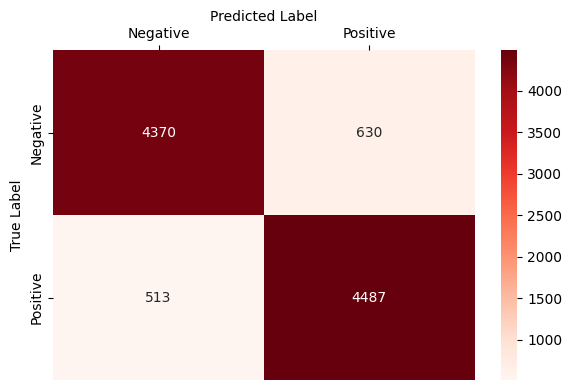

In [ ]:
#Generate a Confusion Matrix for visual representation
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

plt.tight_layout()
plt.show()

### Multinomial Naive Bayes

In [ ]:
#Multinomial Naive Bayes model to train and test data and check accuracy
nb_model = MultinomialNB()

nb_model.fit(X_train_vec, y_train)
print("Multinomial Naive Bayes model training complete.")

nb_pred = nb_model.predict(X_test_vec)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nb_pred))

print("\nClassification Report:")
print(classification_report(y_test, nb_pred))

accuracy_mnb = accuracy_score(y_test, nb_pred) * 100
print(f"Accuracy Score: {accuracy_mnb:.2f}%")

Multinomial Naive Bayes model training complete.

🔹 Confusion Matrix:
[[4216  784]
 [ 671 4329]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5000
           1       0.85      0.87      0.86      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

🔹 Accuracy Score: 85.45%


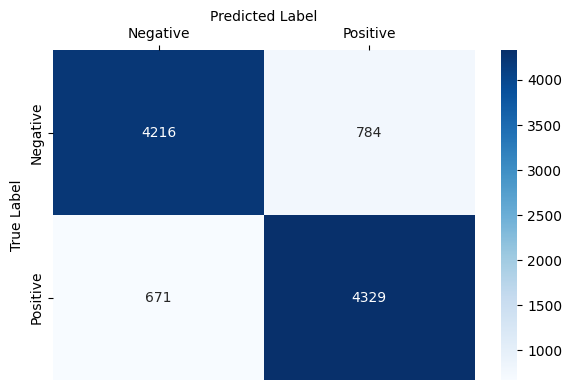

In [ ]:
#Confusion Matrix graph for visual Understanding
cm = confusion_matrix(y_test, nb_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

plt.tight_layout()
plt.show()

### Support Vector Machine

In [ ]:
#SVM model for training and testing, and accuracy
svm_model = LinearSVC()

# Train the model
svm_model.fit(X_train_vec, y_train)
print("Support Vector Machine model training complete.")

# Predict on test set
svm_pred = svm_model.predict(X_test_vec)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_pred))

print("\nClassification Report:")
print(classification_report(y_test, svm_pred))

accuracy_svm = accuracy_score(y_test, svm_pred) * 100
print(f"\nAccuracy: {accuracy_svm:.4f}%")

Support Vector Machine model training complete.

🔹 Confusion Matrix:
[[4363  637]
 [ 574 4426]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5000
           1       0.87      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


🔹 Accuracy: 87.8900%


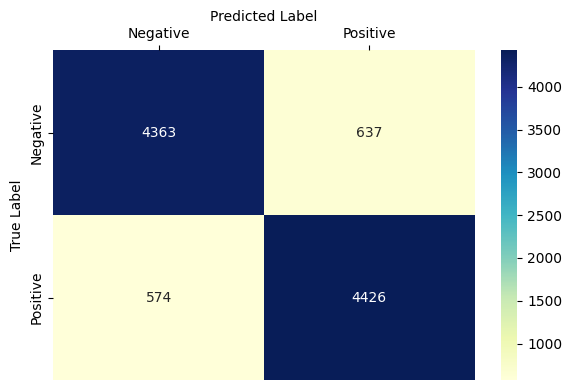

In [40]:
cm = confusion_matrix(y_test, svm_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()

plt.tight_layout()
plt.show()

### Model Performance Comparison

🔹 Model Performance Comparison:

                     Model  Accuracy   F1-Score
0      Logistic Regression    0.8857  88.702184
1          SVM (LinearSVC)   87.8900  87.965815
2  Multinomial Naive Bayes   85.4500  85.612578


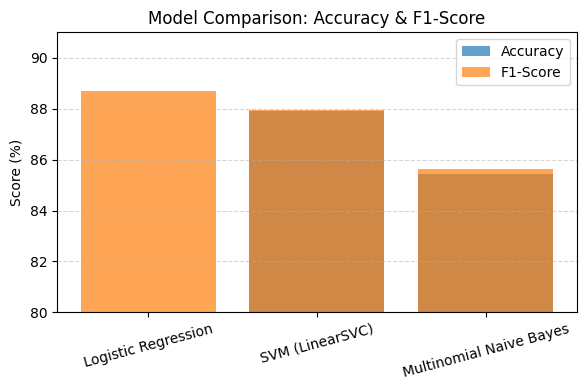

In [ ]:
#Comparison of Model performance to choose the best trained model out of three
f1_logreg = f1_score(y_test, y_pred)
f1_svm = f1_score(y_test, svm_pred)
f1_nb = f1_score(y_test, nb_pred)

model_performance = {
    "Model": ["Logistic Regression", "SVM (LinearSVC)", "Multinomial Naive Bayes"],
    "Accuracy": [accuracy, accuracy_svm, accuracy_mnb],
    "F1-Score": [f1_logreg * 100, f1_svm * 100, f1_nb * 100]
}

df_perf = pd.DataFrame(model_performance)

print("🔹 Model Performance Comparison:\n")
print(df_perf)

plt.figure(figsize=(6, 4))
bar1 = plt.bar(df_perf["Model"], df_perf["Accuracy"], label="Accuracy", alpha=0.7)
bar2 = plt.bar(df_perf["Model"], df_perf["F1-Score"], label="F1-Score", alpha=0.7)
plt.ylabel("Score (%)")
plt.ylim(80, 91)
plt.title("Model Comparison: Accuracy & F1-Score")
plt.legend()
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### Results

### Importing the best Model

In [42]:
joblib.dump(lr_model, "sentiment_model.pkl")

['sentiment_model.pkl']

In [43]:
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']